In [2]:
import csv 
import pandas as pd 
dataFrame = pd.read_csv("surveyDataSience.csv")
print(dataFrame.shape[0])
#avem notiunea de shape 

25974


C:\Users\emato\AppData\Local\Temp\ipykernel_8068\2399595075.py:3: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  dataFrame = pd.read_csv("surveyDataSience.csv")


Numarul de atribute


In [3]:
print(dataFrame.shape[1]) #numar de atribute 

369


In [4]:
dataFrame.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
                                        ...  
Q38_B_Part_8                           object
Q38_B_Part_9                           object
Q38_B_Part_10                          object
Q38_B_Part_11                          object
Q38_B_OTHER                            object
Length: 369, dtype: object

Numarul de reponderenti cu date complete 

In [7]:
dataFrame.dropna().shape[0] 

1

durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata), durata medie a anilor de studii pentru respondentii din Romania si durata medie a anilor de studii pentru respondentii din Romania care sunt femei. Comparati rezultatele obtinute pentru cele trei grupuri de respondenti. Se presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani.


In [29]:
dataFrame["durata_studii"] = (
    dataFrame["Q4"].str.contains("Bachelor’s degree").astype(int) * 3 + 
    dataFrame["Q4"].str.contains("Master’s degree").astype(int) * 5 + 
    dataFrame["Q4"].str.contains("Doctoral degree").astype(int) * 8
)
medie = dataFrame["durata_studii"].mean()
medie_Ro = dataFrame[dataFrame["Q3"] == "Romania"]["durata_studii"].mean()
df_women = dataFrame[(dataFrame["Q3"] == "Romania") & (dataFrame["Q2"] == "Woman")]["durata_studii"]
medie_Fem = df_women.mean()
print(f"Durata medie a anilor de studii superioare {medie}")
print(f"Durata medie a anilor de studii Romania {medie_Ro}")
print(f"Durata medie a anilor de studii a femeilor in romania {medie_Fem}")

Durata medie a anilor de studii superioare 3.9555324555324556
Durata medie a anilor de studii Romania 4.163934426229508
Durata medie a anilor de studii a femeilor in romania 4.75


numarul de respondenti femei din Romania pentru care se detin date complete


In [3]:
df =  pd.read_csv("surveyDataSience.csv")

# Elimin prima linie care conține întrebările în loc de date
df_cleaned = df.iloc[1:].reset_index(drop=True)

# Convertim toate coloanele relevante în string pentru a preveni erori de tip
df_cleaned = df_cleaned.astype(str)

# Identific coloana care conține genul (de obicei este Q2 sau similar)
gender_col = "Q2"  # Verifică numele exact al coloanei în dataset
df_women = df_cleaned[df_cleaned[gender_col] == "Woman"]

# Identific coloanele multiple choice (cele care conțin '_Part_')
multi_choice_cols = [col for col in df_women.columns if '_Part_' in col]

# Respondenți femei care au răspuns la toate întrebările (fără valori lipsă)
complete_responses_women = df_women.dropna().shape[0]

# Respondenți femei care au răspuns la cel puțin o întrebare dintr-un set multiple choice
multi_choice_valid_women = df_women[multi_choice_cols].notna().any(axis=1).sum()

print("Respondenți femei cu toate răspunsurile completate:", complete_responses_women)


C:\Users\emato\AppData\Local\Temp\ipykernel_8068\666333119.py:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv("surveyDataSience.csv")


Respondenți femei cu toate răspunsurile completate: 4890
Respondenți femei care au ales cel puțin o opțiune la multiple choice: 4890


numarul de femei din Romania care programeaza in Python, precum si intervalul de varsta cu cele mai multe femei care programeaza in Python? Dar in C++? Comparati rezultatele obtinute pentru cele doua limbaje de programare.



In [15]:
famWomen= dataFrame[(dataFrame["Q2"] == "Woman") & (dataFrame["Q7_Part_1"]=="Python") 
& (dataFrame["Q3"] == "Romania")].shape[0]
famWomenCpp = dataFrame[(dataFrame["Q2"] == "Woman") & (dataFrame["Q7_Part_5"]=="C++") 
& (dataFrame["Q3"] == "Romania")].shape[0]
print(f"numarul de femei din Romania care programeaza in Python {famWomen}")
print(f"numarul de femei din Romania care programeaza in C++ {famWomenCpp}")

allWomenAges = dataFrame[(dataFrame["Q2"] == "Woman") & (dataFrame["Q7_Part_1"]=="Python") 
& (dataFrame["Q3"] == "Romania")]["Q1"].unique()
print(f"Interval Python {min(int(age.split('-')[0]) for age in allWomenAges)} - {max(int(age.split('-')[-1]) for age in allWomenAges)}")


allWomenAgesCpp = dataFrame[(dataFrame["Q2"] == "Woman") & (dataFrame["Q7_Part_5"]=="C++") 
& (dataFrame["Q3"] == "Romania")]["Q1"].unique()
print(f"Interval C++ {min(int(age.split('-')[0]) for age in allWomenAges)} - {max(int(age.split('-')[-1]) for age in allWomenAges)}")

numarul de femei din Romania care programeaza in Python 12
numarul de femei din Romania care programeaza in C++ 4
Interval Python 18 - 44
Interval C++ 18 - 44


domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature). In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate



In [5]:
df_cleaned = df.iloc[1:].reset_index(drop=True)

for col in df_cleaned.columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='ignore')

feature_info = {}

multi_choice_groups = set()

for col in df_cleaned.columns:
    if '_Part_' in col: 
        base_col = col.split('_Part_')[0]
        multi_choice_groups.add(base_col)
    elif df_cleaned[col].dtype in ['int64', 'float64']:  
        feature_info[col] = {
            "Min": df_cleaned[col].min(),
            "Max": df_cleaned[col].max()
        }
    else:  
        feature_info[col] = {
            "Număr de valori unice": df_cleaned[col].nunique(),
            "Valori unice": df_cleaned[col].unique()[:10]  
        }


for base_col in multi_choice_groups:
    related_cols = [col for col in df_cleaned.columns if col.startswith(base_col + '_Part_')]
    
    unique_values = set()
    for col in related_cols:
        unique_values.update(df_cleaned[col].dropna().unique())
    
    feature_info[base_col] = {
        "Număr total de opțiuni unice": len(unique_values),
        "Opțiuni unice": list(unique_values)[:10] 
    }


for feature, info in feature_info.items():
    print(f"Feature: {feature}")
    for key, value in info.items():
        print(f"  {key}: {value}")
    print("-" * 50)

C:\Users\emato\AppData\Local\Temp\ipykernel_8068\1433913845.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='ignore')


Feature: Time from Start to Finish (seconds)
  Min: 120
  Max: 2488653
--------------------------------------------------
Feature: Q1
  Număr de valori unice: 11
  Valori unice: ['50-54' '22-24' '45-49' '25-29' '18-21' '30-34' '40-44' '35-39' '70+'
 '55-59']
--------------------------------------------------
Feature: Q2
  Număr de valori unice: 5
  Valori unice: ['Man' 'Woman' 'Nonbinary' 'Prefer not to say' 'Prefer to self-describe']
--------------------------------------------------
Feature: Q3
  Număr de valori unice: 66
  Valori unice: ['India' 'Indonesia' 'Pakistan' 'Mexico' 'Russia' 'Turkey' 'Australia'
 'Nigeria' 'Greece' 'Belgium']
--------------------------------------------------
Feature: Q4
  Număr de valori unice: 7
  Valori unice: ['Bachelor’s degree' 'Master’s degree' 'Doctoral degree'
 'I prefer not to answer'
 'Some college/university study without earning a bachelor’s degree'
 'No formal education past high school' 'Professional doctorate']
----------------------------

transformati informatiile despre vechimea in programare in numar de ani (folositi in locul intervalului, mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana). Ce se poate spune despre aceasta variabila?


In [20]:
experience_map = {
    'Less than a year': 0.5,
    '1-2 years': 1.5,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20 or more years': 25
}
df['YearsExperience'] = df['Q6'].map(experience_map)
df_experience = df.dropna(subset=['YearsExperience'])

min_years = df_experience['YearsExperience'].min()
max_years = df_experience['YearsExperience'].max()
mean_years = df_experience['YearsExperience'].mean()
median_years = df_experience['YearsExperience'].median()
std_years = df_experience['YearsExperience'].std()

print(f"Minim: {min_years} ani")
print(f"Maxim: {max_years} ani")
print(f"Media: {mean_years:.2f} ani")
print(f"Mediana: {median_years} ani")
print(f"Deviatia standard: {std_years:.2f} ani")

if std_years > (max_years - min_years) / 4:
    print("Variatia experienței este mare, indicand diferente semnificative intre respondenti.")
else:
    print("Distributia experientei este relativ omogena, fara variatii extreme.")

Minim: 4.0 ani
Maxim: 15.0 ani
Media: 7.72 ani
Mediana: 7.5 ani
Deviatia standard: 4.28 ani
Variatia experienței este mare, indicand diferente semnificative intre respondenti.


1.b. Sa se vizualizeze:

distributia respondentilor care programeaza in Python pe categorii de varsta

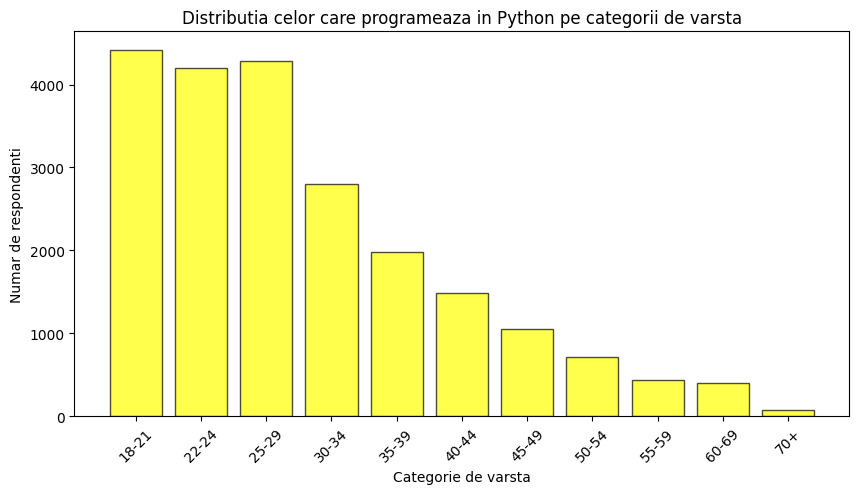

In [12]:
import matplotlib.pyplot as plt

programming_languages = [c for c in df.columns if "Q7_Part" in c]
df_python = df[(df[programming_languages].isin(['Python']).any(axis=1))]
age_counts = df_python["Q1"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values, color='yellow', edgecolor='black', alpha=0.7)

plt.xlabel("Categorie de varsta")
plt.ylabel("Numar de respondenti")
plt.title("Distributia celor care programeaza in Python pe categorii de varsta")
plt.xticks(rotation=45)

plt.show()

distributia respondentilor din Romania care programeaza in Python pe categorii de varsta

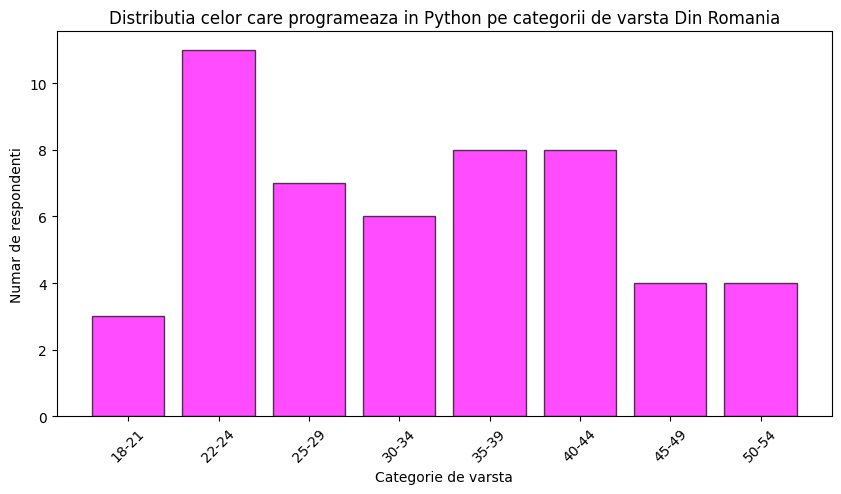

In [13]:

programming_languages = [c for c in df.columns if "Q7_Part" in c]
df_python = df[(df[programming_languages].isin(['Python']).any(axis=1))
& (df["Q3"] == "Romania")]
age_counts = df_python["Q1"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values, color='magenta', edgecolor='black', alpha=0.7)

plt.xlabel("Categorie de varsta")
plt.ylabel("Numar de respondenti")
plt.title("Distributia celor care programeaza in Python pe categorii de varsta Din Romania")
plt.xticks(rotation=45)

plt.show()

distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta


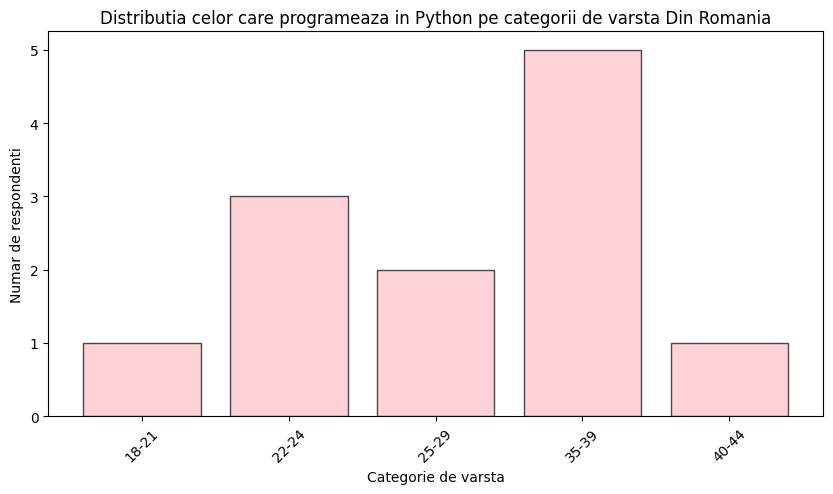

In [18]:
programming_languages = [c for c in df.columns if "Q7_Part" in c]
famWomenAll= dataFrame[(dataFrame["Q2"] == "Woman") & (dataFrame["Q7_Part_1"]=="Python") 
& (dataFrame["Q3"] == "Romania")]
age_counts = famWomenAll["Q1"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values, color='pink', edgecolor='black', alpha=0.7)

plt.xlabel("Categorie de varsta")
plt.ylabel("Numar de respondenti")
plt.title("Distributia celor care programeaza in Python pe categorii de varsta Din Romania")
plt.xticks(rotation=45)

plt.show()

respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare (puteti folositi un boxplot pentru a identifica aceste valori)
 

<Axes: >

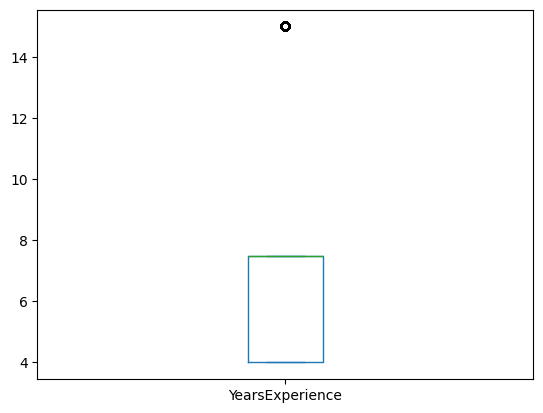

In [21]:
df['Q1'].value_counts()
df_experience.plot(kind = 'box')